# Anomally and Outlier Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_age_notnull = df['Age'][df['Age'].notnull()]

# boxplot

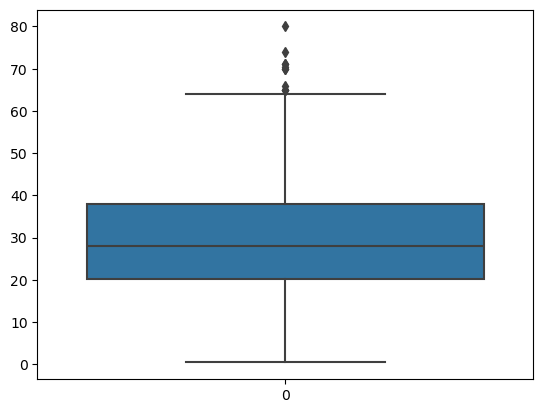

In [7]:
sns.boxplot(df['Age']);

# Outlier

Using IQR

In [8]:
df_age_notnull = df['Age'][df['Age'].notnull()]

In [9]:
q1, q3=np.percentile(df_age_notnull,[25,75])
print(q1, q3)

20.125 38.0


In [10]:
iqr = q3 - q1
print(iqr)

17.875


In [11]:
lower_bound= q1 - (1.5 * iqr)
upper_bound= q3 + (1.5 * iqr)

print (lower_bound)
print (upper_bound)

-6.6875
64.8125


In [14]:
# handling outlier

In [15]:
df_age_new = df['Age'][(df['Age'] > lower_bound) & (df['Age'] < upper_bound)]
print(df_age_new)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 703, dtype: float64


In [16]:
df_age_new.describe()

count    703.000000
mean      29.072077
std       13.728478
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       64.000000
Name: Age, dtype: float64